# NewsMood Analysis

* The sentiment score for an individual tweet varies with no clear patterns for all media sources.

* There are a considerable amount of tweets that score zero (neutral).

* The average scores by media source show BBC being most negative, and Fox being most positive. Since only 100 most recent tweets were collected for each media source, the result would be very different depending on when the analysis is performed.

In [1]:
import tweepy
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
analyzer = SentimentIntensityAnalyzer()

In [3]:
outlets = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes"]

In [4]:
account = []
source = []
text = []
time = []
comp = []
pos = []
neg = []
neu = []
id = []
for outlet in outlets:
    tweets = api.user_timeline(outlet, count=100)
    counter = 0
    for tweet in tweets:
        account.append(tweet["user"]["name"])
        try:
            source.append(tweet["retweeted_status"]["user"]["name"])
        except:
            source.append("-")
        text.append(tweet["text"])
        time.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y").astimezone(pytz.timezone("US/Central")))
        scores = analyzer.polarity_scores(tweet["text"])
        comp.append(scores["compound"])
        pos.append(scores["pos"])
        neg.append(scores["neg"])
        neu.append(scores["neu"])
        counter += 1
        id.append(counter)

In [5]:
df = pd.DataFrame({"Account": account, "Source Account": source, "Text": text, "Time": time, 
                   "Compound Score": comp, "Positive Score": pos, "Negative Score": neg, "Neutral Score": neu, "Tweets Ago": id
                  })
df = df[["Account", "Source Account", "Text", "Time", 
         "Compound Score", "Positive Score", "Negative Score", "Neutral Score", "Tweets Ago"]]
df.to_csv("news_mood.csv", index=False)
df

,Account,Source Account,Text,Time,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,BBC News (World),-,The robots taking on your housework https://t....,2018-06-04 20:51:55-05:00,0.0000,0.000,0.000,1.000,1
1,BBC News (World),-,Early Van Gogh landscape sells for €7m at Fren...,2018-06-04 20:42:45-05:00,0.0000,0.000,0.000,1.000,2
2,BBC News (World),-,Georgia officer fired for hitting suspect with...,2018-06-04 20:28:59-05:00,-0.7003,0.000,0.420,0.580,3
3,BBC News (World),-,Could a text message save thousands of fisherm...,2018-06-04 20:26:30-05:00,0.4939,0.286,0.000,0.714,4
4,BBC News (World),-,Henri van Breda: Axe murderer transfixes South...,2018-06-04 20:21:33-05:00,-0.7184,0.000,0.462,0.538,5
5,BBC News (World),-,Europe and nationalism: A country-by-country g...,2018-06-04 20:16:48-05:00,0.0000,0.000,0.000,1.000,6
6,BBC News (World),-,Trump drops Philadelphia Eagles White House in...,2018-06-04 19:48:55-05:00,-0.1027,0.127,0.159,0.714,7
7,BBC News (World),-,Swimmer Ben Lecomte begins record Pacific cros...,2018-06-04 19:33:12-05:00,0.0000,0.000,0.000,1.000,8
8,BBC News (World),-,Guatemala volcano: Deadly Fuego eruption caugh...,2018-06-04 19:01:36-05:00,0.0000,0.000,0.000,1.000,9
9,BBC News (World),-,Pakistan's soaring rates of 'diabetic foot' ht...,2018-06-04 18:59:22-05:00,0.0000,0.000,0.000,1.000,10


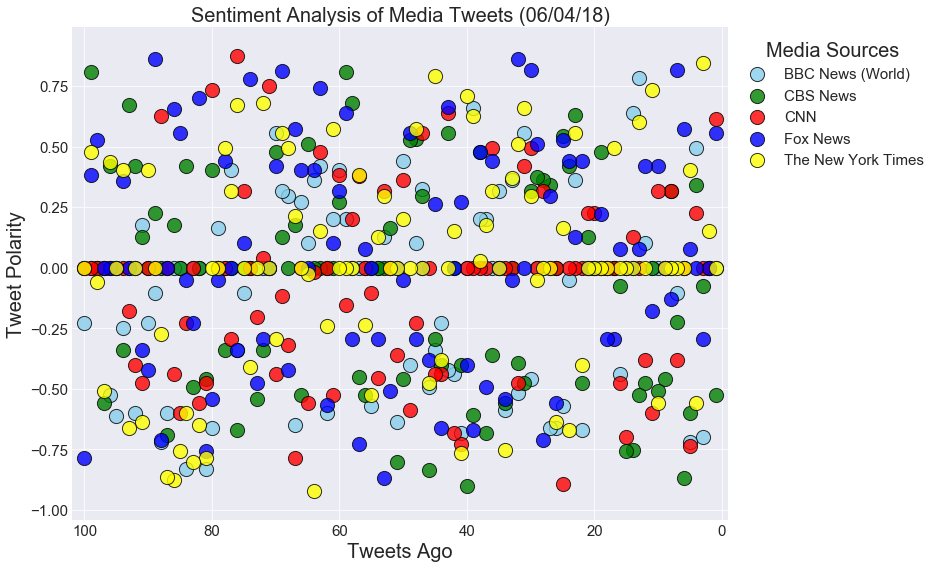

In [6]:
cats = [df.iloc[_, 0] for _ in range(0,500,100)]
colors = ["skyblue", "g", "r", "b", "yellow"]
sns.set_style("darkgrid")
sns.lmplot(x="Tweets Ago", y="Compound Score", data=df, hue="Account", palette={cat:color for cat,color in zip(cats,colors)}, 
           scatter_kws={"alpha": 0.8, "s": 200, "lw": 1, "edgecolors": "k"}, size=7.5, aspect=4/3, legend=False, fit_reg=False)
plt.title(f"Sentiment Analysis of Media Tweets ({datetime.today().strftime('%m/%d/%y')})", size=20)
plt.xlabel("Tweets Ago", size=20)
plt.ylabel("Tweet Polarity", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(102, -1)
leg = plt.legend(fontsize=15, bbox_to_anchor=(1, 1))
leg.set_title("Media Sources", prop={"size": 20})
plt.savefig("plot1", bbox_inches="tight")
plt.show()

In [7]:
overall = df.groupby("Account")[["Compound Score"]].mean().reset_index()
overall

,Account,Compound Score
0,BBC News (World),-0.086637
1,CBS News,-0.059035
2,CNN,-0.049955
3,Fox News,0.051031
4,The New York Times,0.006645


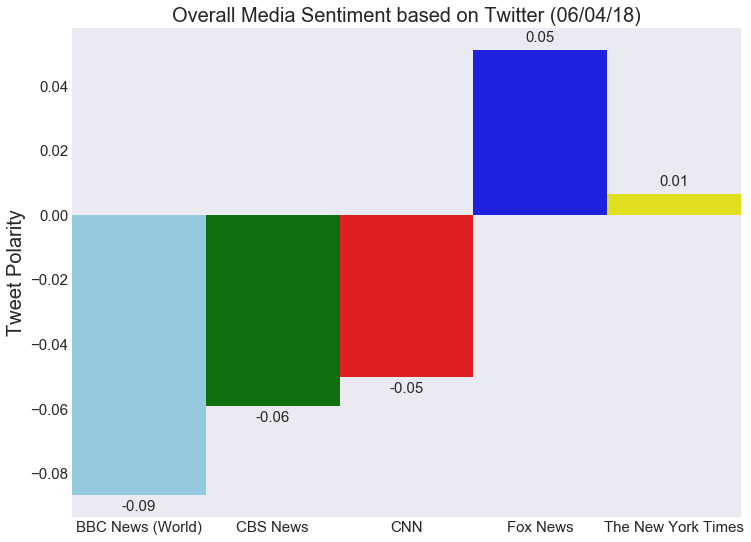

In [8]:
plt.figure(figsize=(12,9))
sns.set_style("dark")
bp = sns.barplot(x="Account", y="Compound Score", data=overall, palette=colors)
[patch.set_width(1) for patch in bp.patches]
# Recenter the bars.
[patch.set_x(patch.get_x()-0.1) for patch in bp.patches]
plt.title(f"Overall Media Sentiment based on Twitter ({datetime.today().strftime('%m/%d/%y')})", size=20)
plt.xlabel("")
plt.ylabel("Tweet Polarity", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
avg_score = list(overall["Compound Score"])
for _ in range(5):
    if avg_score[_] > 0:
        plt.annotate(s=round(avg_score[_],2), xy=(_,avg_score[_]+.0025), size=15, ha="center")
    else:
        plt.annotate(s=round(avg_score[_],2), xy=(_,avg_score[_]-.005), size=15, ha="center")
plt.savefig("plot2", bbox_inches="tight")
plt.show()